<a href="https://colab.research.google.com/github/Sharaffin/House-Price-Prediction/blob/main/house_price_prediction_california_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CALIFORNIA HOUSE PRICE PREDICTION


DATASET - https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download

https://www.youtube.com/watch?v=Wqmtf9SA_kk

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housing_median_age

total_rooms

total_bedrooms

population

households

median_income

median_house_value

ocean_proximity

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("/content/drive/MyDrive/housing.csv")

In [6]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


most values are 20640, but total_bedrooms are having only 20433
ocean proximity has text as near bay and inland, got to remove them before feeding them into the model.

In [8]:
#data.dropna() will drop all rows with null values and give us a view
#data.dropna(inplace=True) ---> will drop the rows will null values and apply the changes


data.dropna(inplace=True)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Train and test the data

In [10]:
# importing the train test from sklearn
#removing the dependent value (output value-price) from the dataset and X will have other indpt values as input
#storing the output value in Y dataset, only price column will be there



from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis= 1)
Y = data['median_house_value']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [12]:
train_data = X_train.join(Y_train)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2697,-115.37,32.82,30.0,1602.0,322.0,1130.0,335.0,3.5735,INLAND,71100.0
16006,-122.46,37.74,51.0,1905.0,291.0,707.0,284.0,6.2561,NEAR BAY,431000.0
11731,-120.81,39.02,30.0,806.0,189.0,326.0,146.0,2.8155,INLAND,101000.0
17407,-120.45,34.94,24.0,1702.0,447.0,1240.0,417.0,2.4091,<1H OCEAN,115500.0
18023,-121.95,37.25,34.0,2906.0,544.0,1282.0,522.0,5.5127,<1H OCEAN,268200.0
...,...,...,...,...,...,...,...,...,...,...
4732,-118.36,34.05,45.0,1879.0,395.0,946.0,409.0,3.3333,<1H OCEAN,254700.0
976,-121.89,37.66,3.0,1565.0,464.0,769.0,461.0,2.1187,INLAND,231300.0
15176,-117.08,33.03,10.0,2296.0,450.0,818.0,405.0,4.3424,<1H OCEAN,160600.0
1249,-122.09,39.13,28.0,4169.0,895.0,2587.0,810.0,2.3310,INLAND,65500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

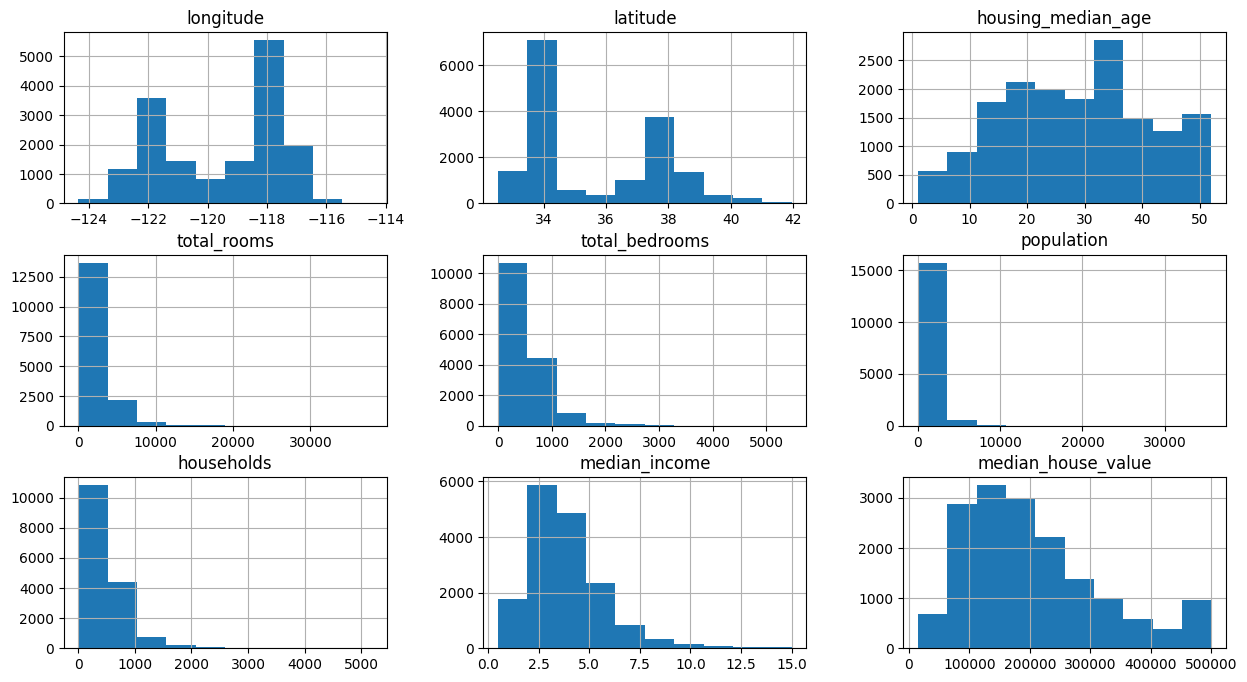

In [14]:
train_data.hist(figsize= (15,8))

if you see in the map, households, total_rooms, total_bedrooms, population are skewed, s we need to fix that

<ipython-input-15-00d940e4cb68>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")


<Axes: >

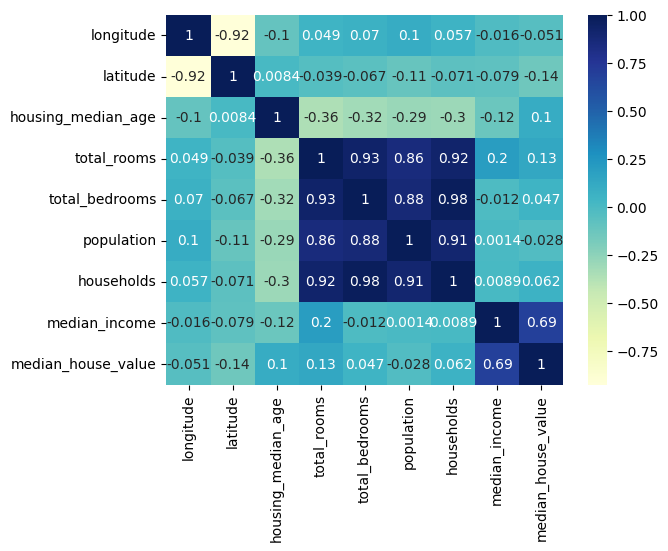

In [15]:
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

 taking the logarithm of the values in the 'total_rooms' column and adding 1 before applying the logarithm. This "+1" is often added before applying the logarithm to avoid taking the logarithm of zero or negative values.

By taking the logarithm of the values, you are transforming the data to a logarithmic scale. This transformation can help to normalize the distribution of the data, especially when the original values are skewed or have a wide range.

In [16]:
#to fix those values which are skewed in that map

train_data['total_rooms'] = np.log(train_data['total_rooms']+ 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+ 1)
train_data['population'] = np.log(train_data['population']+ 1)
train_data['households'] = np.log(train_data['households']+ 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

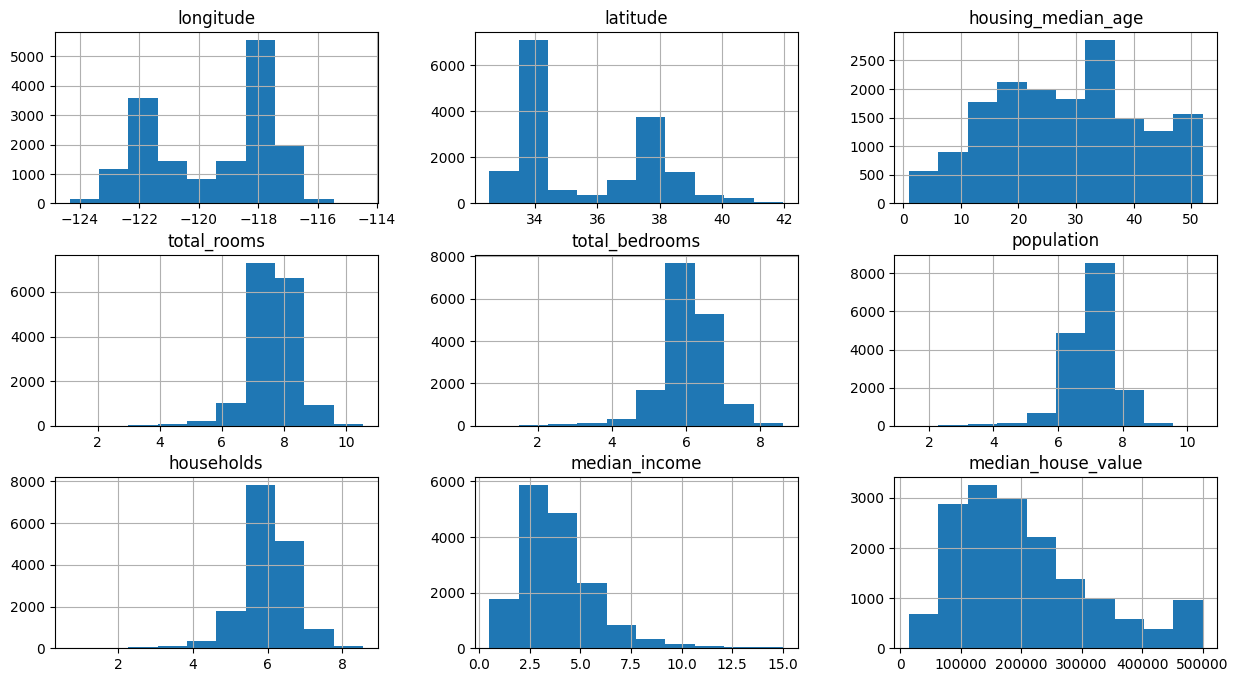

In [17]:
train_data.hist(figsize=(15,8))

#check the histogram below its not skewed

In [18]:
#we need to use ocean proximity values but need to convert it to numerical values and use them

In [19]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7217
INLAND        5185
NEAR OCEAN    2109
NEAR BAY      1831
ISLAND           4
Name: ocean_proximity, dtype: int64

In [20]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2697,0,1,0,0,0
16006,0,0,0,1,0
11731,0,1,0,0,0
17407,1,0,0,0,0
18023,1,0,0,0,0
...,...,...,...,...,...
4732,1,0,0,0,0
976,0,1,0,0,0
15176,1,0,0,0,0
1249,0,1,0,0,0


In [21]:
train_data =train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis =1)

In [22]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2697,-115.37,32.82,30.0,7.379632,5.777652,7.030857,5.817111,3.5735,71100.0,0,1,0,0,0
16006,-122.46,37.74,51.0,7.552762,5.676754,6.562444,5.652489,6.2561,431000.0,0,0,0,1,0
11731,-120.81,39.02,30.0,6.693324,5.247024,5.789960,4.990433,2.8155,101000.0,0,1,0,0,0
17407,-120.45,34.94,24.0,7.440147,6.104793,7.123673,6.035481,2.4091,115500.0,1,0,0,0,0
18023,-121.95,37.25,34.0,7.974877,6.300786,7.156956,6.259581,5.5127,268200.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,-118.36,34.05,45.0,7.539027,5.981414,6.853299,6.016157,3.3333,254700.0,1,0,0,0,0
976,-121.89,37.66,3.0,7.356280,6.142037,6.646391,6.135565,2.1187,231300.0,0,1,0,0,0
15176,-117.08,33.03,10.0,7.739359,6.111467,6.708084,6.006353,4.3424,160600.0,1,0,0,0,0
1249,-122.09,39.13,28.0,8.335671,6.797940,7.858641,6.698268,2.3310,65500.0,0,1,0,0,0


<Axes: >

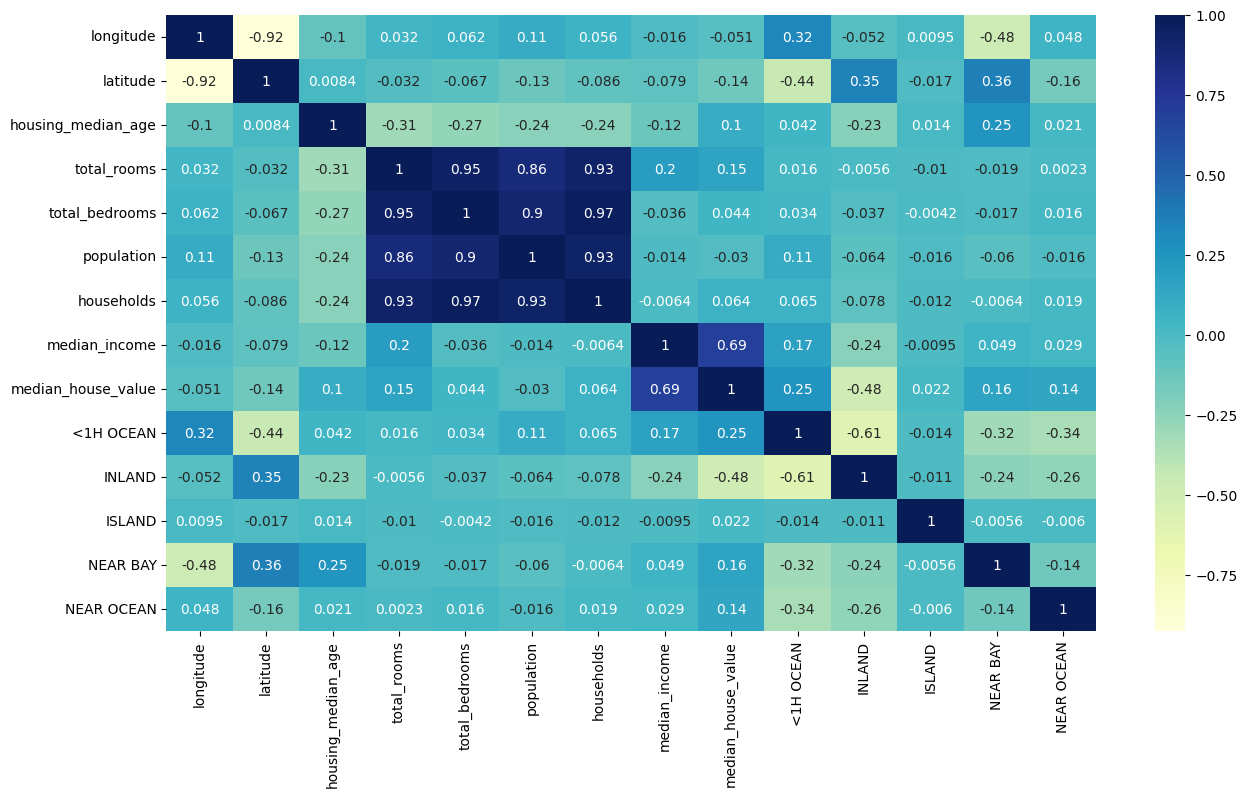

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

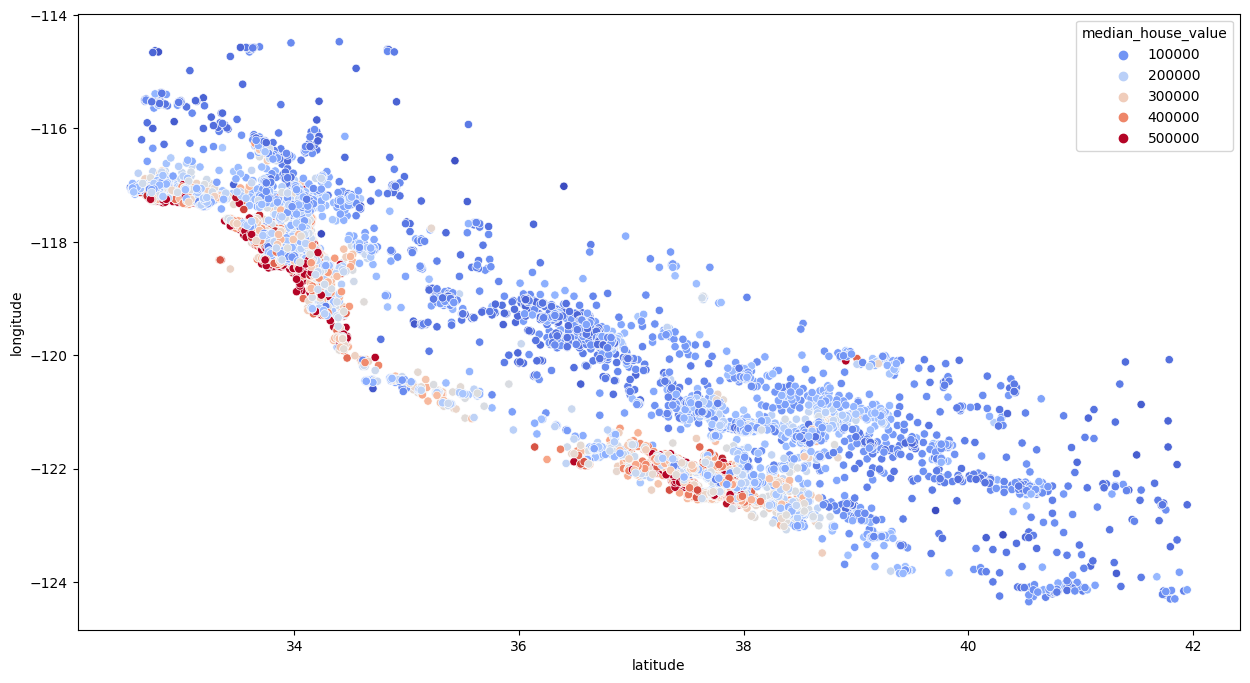

In [24]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude", data= train_data, hue="median_house_value", palette="coolwarm")

In [25]:
#we have total rooms and total bedrooms, it would be interesting to find how many rooms are bedrooms out of all rooms

In [26]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['households_rooms'] = train_data['total_rooms']/train_data['households']

In [27]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_rooms
2697,-115.37,32.82,30.0,7.379632,5.777652,7.030857,5.817111,3.5735,71100.0,0,1,0,0,0,0.782919,1.268608
16006,-122.46,37.74,51.0,7.552762,5.676754,6.562444,5.652489,6.2561,431000.0,0,0,0,1,0,0.751613,1.336183
11731,-120.81,39.02,30.0,6.693324,5.247024,5.789960,4.990433,2.8155,101000.0,0,1,0,0,0,0.783919,1.341231
17407,-120.45,34.94,24.0,7.440147,6.104793,7.123673,6.035481,2.4091,115500.0,1,0,0,0,0,0.820521,1.232735
18023,-121.95,37.25,34.0,7.974877,6.300786,7.156956,6.259581,5.5127,268200.0,1,0,0,0,0,0.790079,1.274027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4732,-118.36,34.05,45.0,7.539027,5.981414,6.853299,6.016157,3.3333,254700.0,1,0,0,0,0,0.793393,1.253130
976,-121.89,37.66,3.0,7.356280,6.142037,6.646391,6.135565,2.1187,231300.0,0,1,0,0,0,0.834938,1.198957
15176,-117.08,33.03,10.0,7.739359,6.111467,6.708084,6.006353,4.3424,160600.0,1,0,0,0,0,0.789661,1.288529
1249,-122.09,39.13,28.0,8.335671,6.797940,7.858641,6.698268,2.3310,65500.0,0,1,0,0,0,0.815524,1.244452


<Axes: >

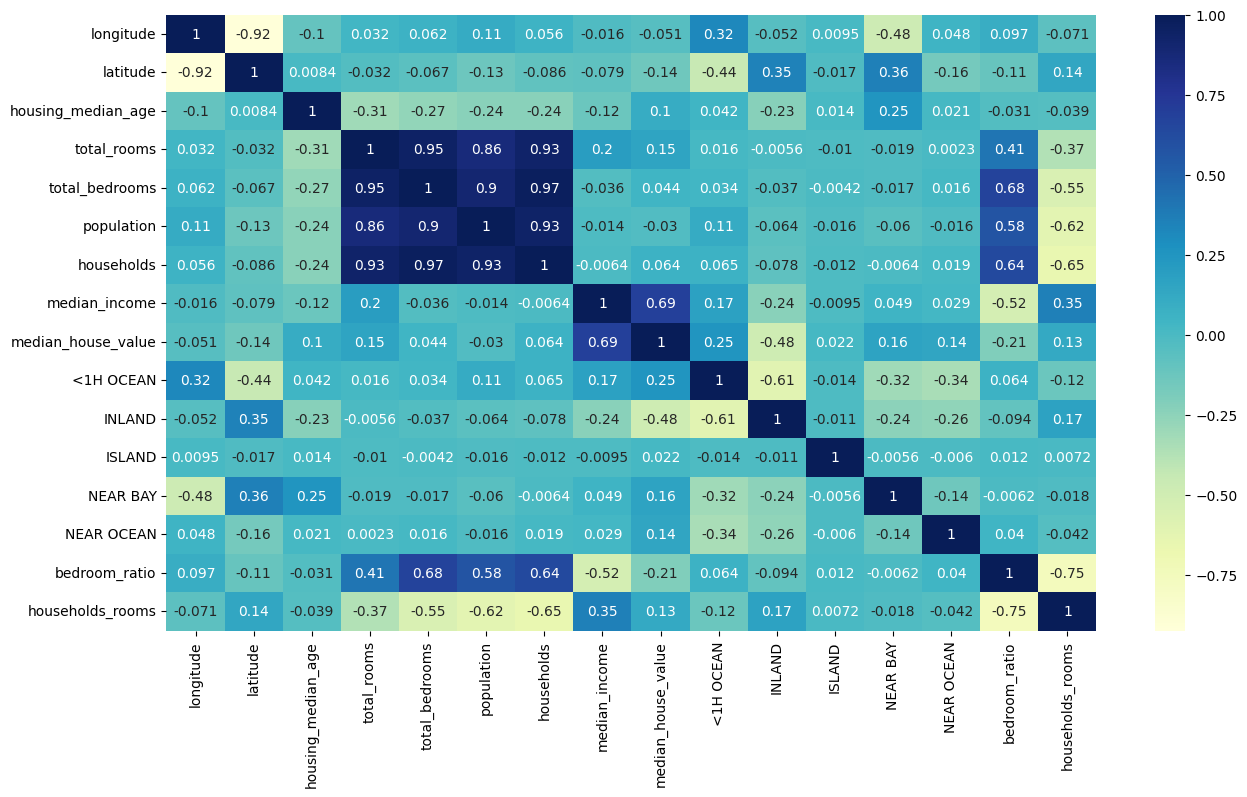

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
X_train,Y_train= train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)
reg= LinearRegression()
reg.fit(X_train_s, Y_train)

LinearRegression()

In [31]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+ 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+ 1)
test_data['population'] = np.log(test_data['population']+ 1)
test_data['households'] = np.log(test_data['households']+ 1)

test_data =test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis =1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['households_rooms'] = test_data['total_rooms']/test_data['households']




In [32]:

X_test, Y_test= test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [33]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,households_rooms
17712,-121.80,37.34,25.0,7.404279,5.697093,7.044905,5.634790,5.2088,231400.0,1,0,0,0,0,0.769433,1.314029
20499,-118.71,34.30,23.0,7.592870,5.638355,6.886532,5.662960,6.3199,236700.0,1,0,0,0,0,0.742585,1.340795
2690,-115.52,32.97,24.0,7.388946,5.905362,7.256297,5.996452,1.9750,66400.0,0,1,0,0,0,0.799216,1.232220
10426,-117.61,33.45,6.0,6.857514,5.220356,6.056784,5.231109,4.7237,220700.0,0,0,0,0,1,0.761261,1.310910
17714,-121.79,37.34,20.0,7.610358,5.796058,7.087574,5.780744,4.9318,262400.0,1,0,0,0,0,0.761601,1.316502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-121.97,37.95,8.0,8.355615,6.565265,7.541152,6.496775,5.4310,246700.0,0,1,0,0,0,0.785731,1.286117
20432,-118.74,34.25,25.0,7.504392,5.641907,6.867974,5.652489,5.4243,214700.0,1,0,0,0,0,0.751814,1.327626
5003,-118.32,34.02,50.0,7.412160,5.549076,6.511745,5.564520,4.2554,194300.0,1,0,0,0,0,0.748645,1.332039
154,-122.22,37.81,52.0,7.982075,5.998937,6.929517,5.942799,8.1564,390100.0,0,0,0,1,0,0.751551,1.343151


In [43]:
X_test_s = scaler.transform(X_test)

In [35]:
reg.score(X_test_s, Y_test)

0.6693636228349367

In [36]:
from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

forest.fit(X_train_s,Y_train)

RandomForestRegressor()

In [37]:
forest.score(X_test_s, Y_test)

0.8208562784688114

In [38]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    "n_estimators":[100,200,300],
    "min_samples_split":[2,4],
    "max_depth":[None,4,8]

}

In [39]:
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring ="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(X_train_s, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [40]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [45]:
grid_search.best_estimator_.score(X_test_s,Y_test)

0.8208151329271465